# 07 Visualizing PCs part 2

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import sys
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
import pickle as pkl
import joblib
from collections import defaultdict

from statsmodels.api import OLS

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score, r2_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize

sys.path.append('../..')
from nonlinear_significance.scripts.TreeTester import TreeTester
from nonlinear_significance.scripts.util import TreeTransformer

from simulations_util import *
from visualizing_PCs_util import *

## 1. XOR

In [2]:
n_grid = [100, 200, 400, 1000]
p = 10
k = 0
params = {"beta": 1,
          "sigma": 1,
          "heritability": 0.9}
target_func = lambda Z :  ((Z[:, 0] * Z[:, 1]) > 0)
xor_results = run_sims(xor, n_grid, p, params, k, target_func)
# joblib.dump(hp_results, output_file)
# results = pkl.load(open(output_file, "rb"))

100%|██████████| 4/4 [00:25<00:00,  6.44s/it]


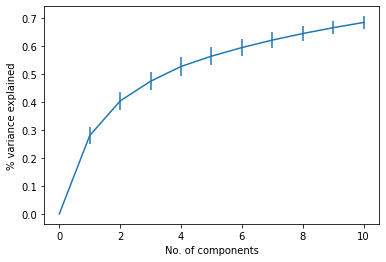

(array([0.        , 0.27950228, 0.40313322, 0.47332844, 0.52601084,
        0.56266507, 0.59339933, 0.62006875, 0.64346255, 0.66429115,
        0.68297462]),
 array([0.        , 0.03057449, 0.03155755, 0.03305802, 0.03302251,
        0.03262828, 0.03008528, 0.02785688, 0.02598363, 0.0241137 ,
        0.02214837]))

In [3]:
make_pca_variance_plot(xor_results, 200, save=False, experiment="xor")

With heritability=0.4

In [3]:
n = 400
xor_results[n][0]["pca_results"]

,pca_var_exp,corr_with_base_feat,corr_with_target,y_var_explained,y_var_exp_norm,t-statistic
0,0.234492,0.894822,-0.045763,0.002777,0.005391,-0.929555
1,0.105519,-0.320253,0.030141,0.001323,0.002569,0.641604
2,0.052929,-0.221183,0.134290,0.011028,0.021413,1.852496
3,0.045153,-0.026812,0.769038,0.294563,0.571916,9.573910
4,0.040302,-0.084628,-0.184763,0.014458,0.028072,-2.121082
5,0.031682,0.010141,-0.241705,0.037376,0.072569,-3.410345
6,0.024818,0.062936,0.158360,0.019746,0.038338,2.478769
7,0.019670,0.007775,-0.022454,0.000028,0.000054,0.093124
8,0.016630,0.047030,0.074881,0.003323,0.006451,1.016827
9,0.016531,0.016727,-0.115964,0.004783,0.009287,-1.220034


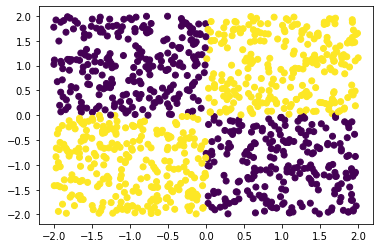

In [9]:
plt.scatter(X[:,0], X[:,1], c=xor(X, sigma=0, beta=1))

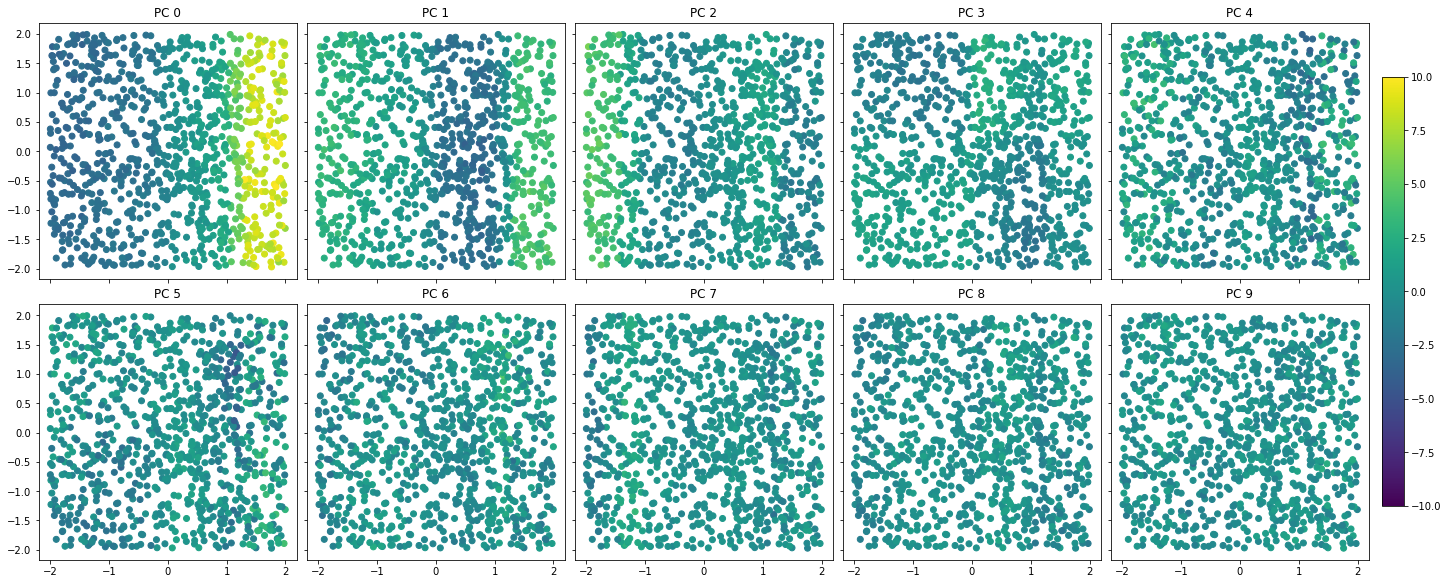

In [10]:
n = 400
X = np.random.uniform(-2, 2, (1000, p))
make_2d_plot(xor_results[n][0]["tree_transformer"], X, c_plotted=10, save=True, experiment="xor")

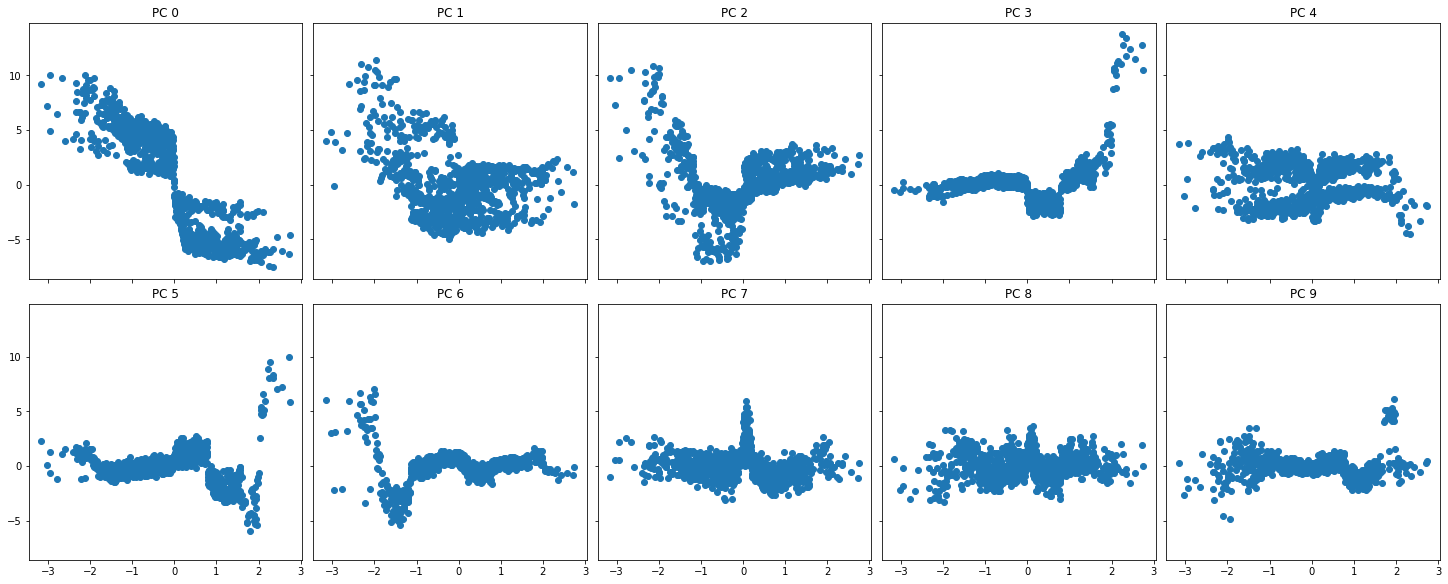

In [12]:
X = np.random.randn(n, p)
make_plot(xor_results[n][5]["tree_transformer"], X, c_plotted=10, save=False, experiment="xor", original_feat=0, reference_feat=0)

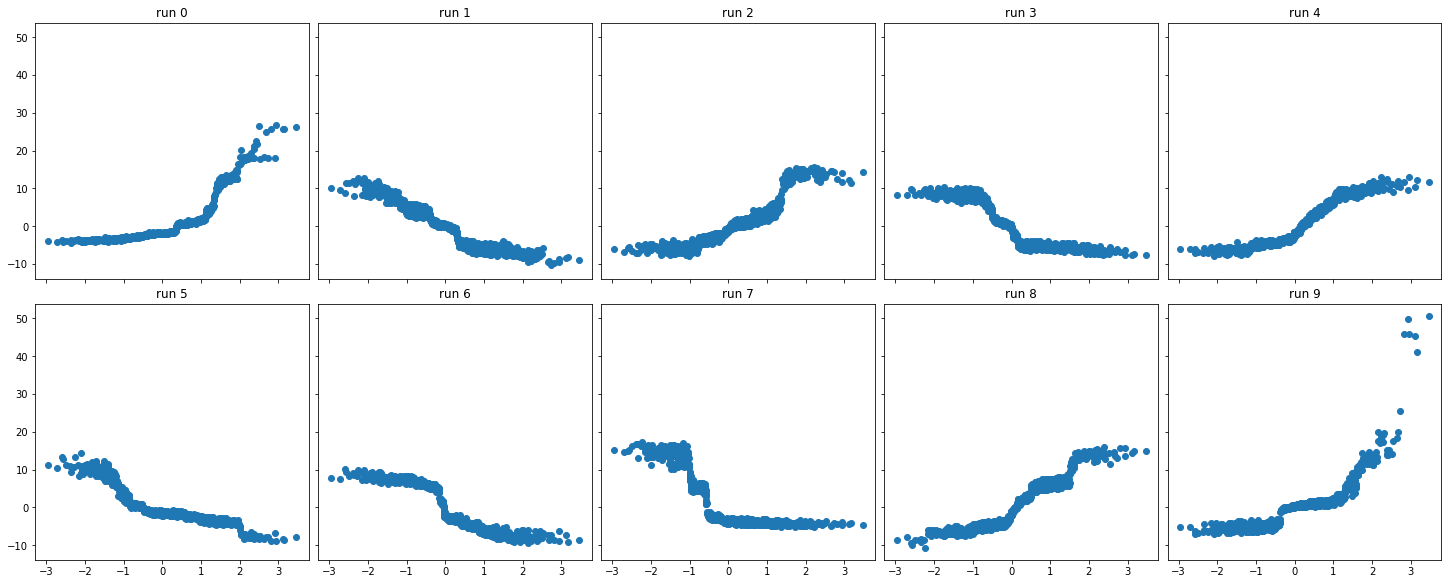

In [11]:
plot_across_runs(hp_results, X, vary_n=False, pc_no=0, save=False, experiment_name="hp_PC0_across_runs", n=n)

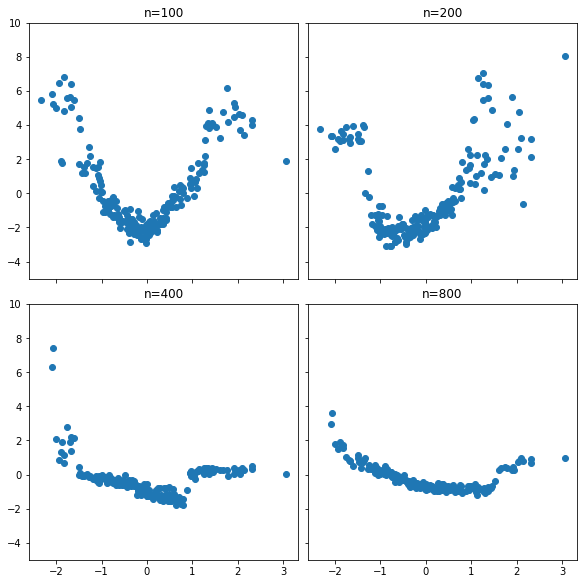

In [483]:
plot_across_runs(ss_results, X, vary_n=True, pc_no=1, save=True, experiment_name="ss_PC1_across_n", r=1, ylim=[-5,10])